## Lasso regression for sparse data

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import class_FM as FM
from sklearn import preprocessing
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


### Initialize factorial model and sample dataset for k=3

In [4]:
n = 1000
k = 3
degree = 3
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)


### Fit Lasso regression with cross validation for alpha

In [5]:
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.         -0.4637746   0.          0.00316037 -0.8622292  -0.00868518
  0.03107943 -0.11330536]
Mean Squared Error of y: 0.0101635675576649
Mean Squared Error of beta: 0.00020646692428272218


### Compute expected outcomes as linear combinations of betas

In [6]:
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -0.46  0.    0.   -1.33 -0.47  0.03 -1.41]


### Cluster treatment combinations by expected outcomes

In [7]:
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0]; score: -2.54
Max clusters: 2; cluster labels: [1 1 1 1 0 1 1 0]; score: -0.31
Max clusters: 3; cluster labels: [1 2 1 1 0 2 1 0]; score: -0.00
Max clusters: 4; cluster labels: [1 2 1 1 0 2 1 3]; score: -0.00
Max clusters: 5; cluster labels: [1 2 1 1 0 2 4 3]; score: -0.00
Max clusters: 6; cluster labels: [1 2 1 1 0 5 4 3]; score: -0.00
Max clusters: 7; cluster labels: [6 2 6 1 0 5 4 3]; score: -0.00


### Plot betas and expected outcomes

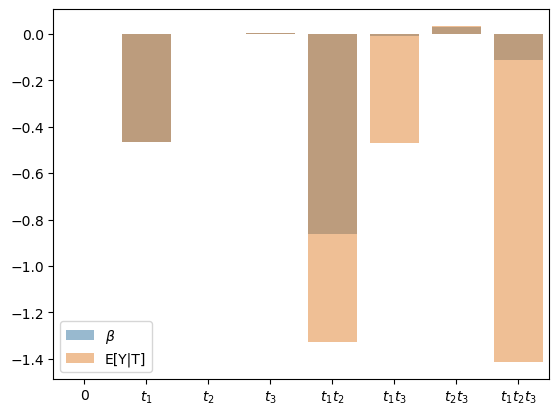

In [8]:
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Factorial model and sample dataset for k=4

In [9]:
n = 1000
k = 4
degree = 4
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)

In [10]:
# Fit Lasso regression with cross validation for alpha
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.         -0.54345095  0.38622147  0.48311728  0.         -0.01750216
  0.06066965 -0.15994371  0.00780462  0.01052256  0.01000165 -0.
 -0.01050092 -0.          0.18682466 -0.41272697]
Mean Squared Error of y: 0.009933494244025193
Mean Squared Error of beta: 0.00039908738108351827


In [11]:
# Compute expected outcomes as linear combinations of betas
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -0.54  0.39  0.48  0.   -0.17  0.   -0.7   0.88  0.4   0.49  0.38
 -0.33 -0.15  1.08  0.  ]


In [12]:
print(betas.shape, expected_outcomes.shape)

(16,) (16,)


In [13]:
# Cluster treatment combinations by expected outcomes
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]; score: -3.53
Max clusters: 2; cluster labels: [1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1]; score: -1.90
Max clusters: 3; cluster labels: [2 2 1 1 2 2 2 2 0 1 1 1 2 2 0 2]; score: -0.59
Max clusters: 4; cluster labels: [2 3 1 1 2 2 2 3 0 1 1 1 2 2 0 2]; score: -0.15
Max clusters: 5; cluster labels: [2 3 1 1 2 4 2 3 0 1 1 1 4 4 0 2]; score: -0.07
Max clusters: 6; cluster labels: [2 3 1 1 2 4 2 3 0 1 1 1 4 4 5 2]; score: -0.05
Max clusters: 7; cluster labels: [2 3 1 1 2 4 2 3 0 1 1 1 6 4 5 2]; score: -0.03
Max clusters: 8; cluster labels: [1 4 3 3 1 6 1 2 0 3 3 3 7 6 5 1]; score: -0.01
Max clusters: 9; cluster labels: [1 4 3 8 1 6 1 2 0 3 8 3 7 6 5 1]; score: -0.00
Max clusters: 10; cluster labels: [1 4 3 8 1 6 1 2 0 3 8 3 7 9 5 1]; score: -0.00
Max clusters: 11; cluster labels: [ 1  4 10  8  1  6  1  2  0  3  8 10  7  9  5  1]; score: -0.00
Max clusters: 12; cluster labels: [ 1  4 10 11  1  6  1  2  0  3  8 10  7  9  5  1]; score:

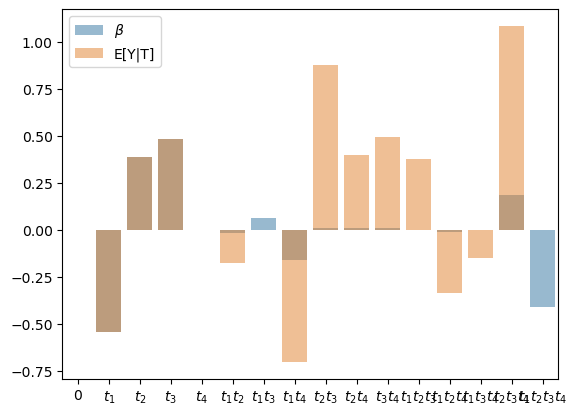

In [14]:
# Plot betas and expected outcomes
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_3 t_4$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_3 t_4$",
        r"$t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_4$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_3 t_4$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_3 t_4$",
        r"$t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_4$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Factorial model and sample dataset for k=5

In [15]:
n = 1000
k = 5
degree = 5
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)

In [16]:
# Fit Lasso regression with cross validation for alpha
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.         -0.00615009  0.36288023  0.          0.00563909  0.00419083
  0.00781549 -0.02543805  0.          0.          0.03989425  0.01223168
 -0.          0.          0.1736125  -0.43732393  0.19791086  0.
  0.08772854 -0.         -0.          0.          0.5031518  -0.
 -0.15236871 -0.15900046 -0.          0.          0.         -0.02823879
 -0.         -0.        ]
Mean Squared Error of y: 0.010939825619446581
Mean Squared Error of beta: 0.005701353307813406


In [17]:
# Compute expected outcomes as linear combinations of betas
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -0.01  0.36  0.    0.01  0.    0.36 -0.03 -0.   -0.    0.4   0.38
  0.37  0.01  0.18 -0.43  0.58  0.38  0.46 -0.03  0.15 -0.43  0.92  0.58
 -0.2  -0.41  1.1   0.84 -0.12 -0.47  0.35  0.59]


In [18]:
print(betas.shape, expected_outcomes.shape)

(32,) (32,)


In [19]:
# Cluster treatment combinations by expected outcomes
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]; score: -4.76
Max clusters: 2; cluster labels: [1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0]; score: -1.45
Max clusters: 3; cluster labels: [1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 2 0 1 1 2 2 1 1 0 0]; score: -0.80
Max clusters: 4; cluster labels: [3 3 0 3 3 3 0 3 3 3 0 0 0 3 3 1 0 0 0 3 3 1 2 0 1 1 2 2 3 1 0 0]; score: -0.24
Max clusters: 5; cluster labels: [3 3 0 3 3 3 0 3 3 3 0 0 0 3 3 4 0 0 0 3 3 4 2 0 1 4 2 2 1 4 0 0]; score: -0.18
Max clusters: 6; cluster labels: [3 3 0 3 3 3 0 3 3 3 0 0 0 3 3 4 5 0 0 3 3 4 2 5 1 4 2 2 1 4 0 5]; score: -0.10
Max clusters: 7; cluster labels: [3 3 0 3 3 3 0 3 3 3 0 0 0 3 3 4 5 0 0 3 3 4 2 5 1 4 6 2 1 4 0 5]; score: -0.07
Max clusters: 8; cluster labels: [3 3 0 3 3 3 0 3 3 3 0 0 0 3 6 4 5 0 0 3 6 4 2 5 1 4 7 2 1 4 0 5]; score: -0.02
Max clusters: 9; cluster labels: [3 3 0 3 3 3 0 3 3 3 0 0 0 3 6 4 5 0 0 3 6 4 2 5 1 4 7 2 8 4 0 

/opt/miniconda3/envs/causal/lib/python3.12/site-packages/sklearn/base.py:1474: ConvergenceWarning: Number of distinct clusters (30) found smaller than n_clusters (31). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


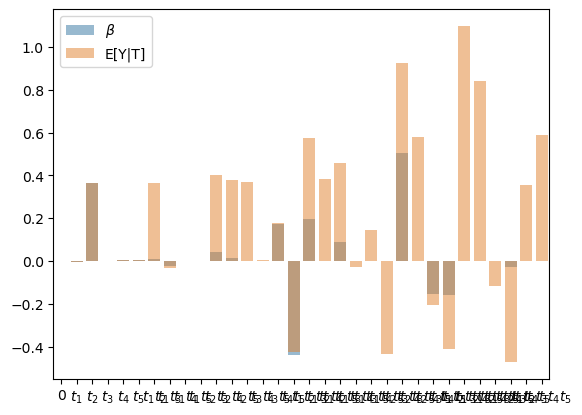

In [20]:
# Plot betas and expected outcomes
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_5$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_1 t_5$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_2 t_5$",
        r"$t_3 t_4$",
        r"$t_3 t_5$",
        r"$t_4 t_5$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_2 t_5$",
        r"$t_1 t_3 t_4$",
        r"$t_1 t_3 t_5$",
        r"$t_1 t_4 t_5$",
        r"$t_2 t_3 t_4$",
        r"$t_2 t_3 t_5$",
        r"$t_2 t_4 t_5$",
        r"$t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_5$",
        r"$t_1 t_2 t_4 t_5$",
        r"$t_1 t_3 t_4 t_5$",
        r"$t_2 t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4 t_5$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_5$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_1 t_5$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_2 t_5$",
        r"$t_3 t_4$",
        r"$t_3 t_5$",
        r"$t_4 t_5$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_2 t_5$",
        r"$t_1 t_3 t_4$",
        r"$t_1 t_3 t_5$",
        r"$t_1 t_4 t_5$",
        r"$t_2 t_3 t_4$",
        r"$t_2 t_3 t_5$",
        r"$t_2 t_4 t_5$",
        r"$t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_5$",
        r"$t_1 t_2 t_4 t_5$",
        r"$t_1 t_3 t_4 t_5$",
        r"$t_2 t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4 t_5$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Generate data for m less than sp

In [21]:
#s = sparsity * len(beta)
#if k is 10: 88
# so error low if 88 * log(176) >= 197
def run_generation(n_max, k, sparsity, step):
    mse_dict = {}
    for n in range(20, n_max, step):
        #dictionary for mse's
        
        degree = k
        sigma = 0.1

        fm = FM.FactorialModel(
            n=n,
            k=k,
            degree=degree,
            sigma=sigma,
            sparsity=sparsity,
            beta_seed=42,
        )
        t, y = fm.sample(seed=0)


        pf = preprocessing.PolynomialFeatures(
        degree=degree, interaction_only=True, include_bias=True,
        )
        T = pf.fit_transform(t)
        T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
        alpha_cv = [0.001, 0.01, 0.1, 0.5]
        model = LassoCV(alphas=alpha_cv, cv=5, random_state=42, max_iter=10000)
        model.fit(T_train, y_train)
        # print(f'alpha={model.alpha_}\nbetas={model.coef_}')

        y_pred = model.predict(T_test)
        mse = mean_squared_error(y_test, y_pred)
        # print(f"Mean Squared Error of y: {mse}")

        beta_actual = fm.beta
        beta_hat = model.coef_
        mse_beta = mean_squared_error(beta_actual, beta_hat)
        # print(f"Mean Squared Error of beta: {mse_beta}")

        mse_dict[n] = (mse, mse_beta)
    return mse_dict, len(fm.beta)

In [22]:
def draw_charts(mse_dict):
    n = list(mse_dict.keys())
    mse, mse_beta = zip(*mse_dict.values())

    fig, ax1 = plt.subplots()

    # Plot the first line (mse) on the first y-axis
    color = 'tab:red'
    ax1.set_xlabel('n')
    ax1.set_ylabel('mse', color=color)
    ax1.plot(n, mse, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis for the second line (mse_beta)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('mse_beta', color=color)
    ax2.plot(n, mse_beta, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # For layout
    plt.title('MSE and MSE_Beta vs n')
    plt.show()

In [23]:
def calc_tipping_point(sparsity, length, k):
    return k * (1-sparsity) * length

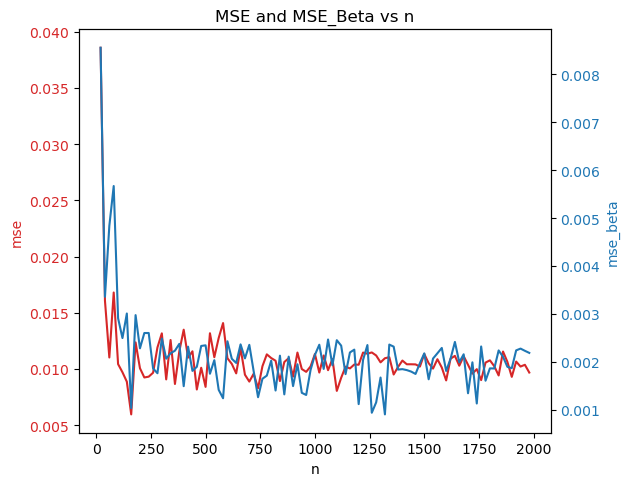

31.999999999999993


In [24]:
n_max = 2000
k = 5
sparsity = 0.8
mse_dict, length = run_generation(n_max, k, sparsity, 20)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length, k))

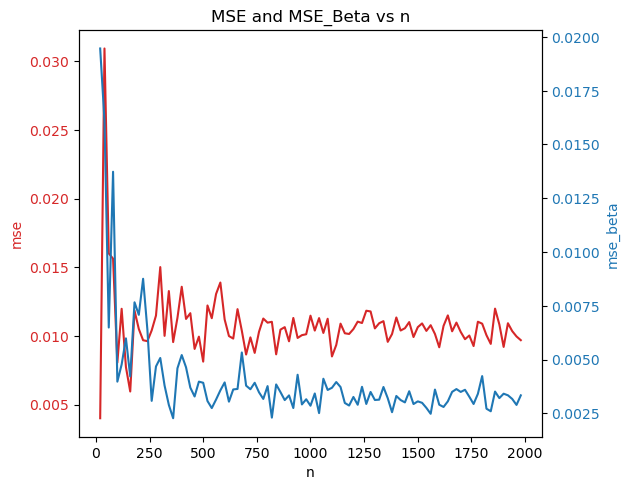

128.0


In [25]:
n_max = 2000
k = 5
sparsity = 0.2
mse_dict, length = run_generation(n_max, k, sparsity, 20)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length, k))

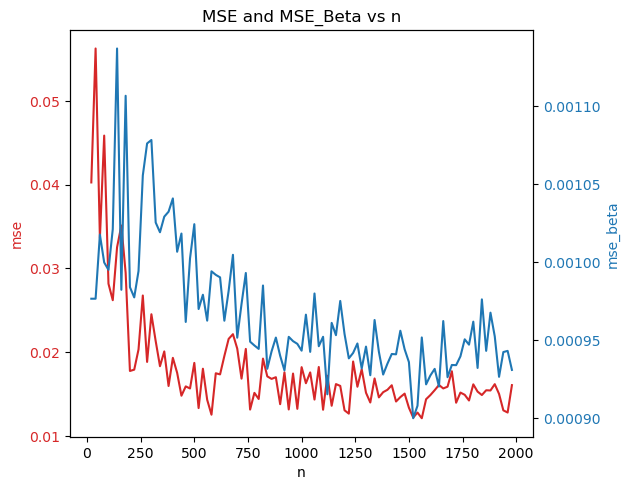

8192.0


In [26]:
n_max = 2000
k = 10
sparsity = 0.2
mse_dict, length = run_generation(n_max, k, sparsity, 20)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length, k))